 # Machine Learning models

In [25]:
"""summary
compare models using barplot
Accuracy score algorithm
1. Logistic regression
2. KNN - K-nearest neighbor
3. SVM - Support Vector Machines
4. Naive Bayes - Gaussian Naive Bayes
5. Decision Tree Classifier
4. Random Forest Classifier
5. Confusion Matrices
"""

'summary\ncompare models using barplot\nAccuracy score algorithm\n1. Logistic regression\n2. KNN - K-nearest neighbor\n3. SVM - Support Vector Machines\n4. Naive Bayes - Gaussian Naive Bayes\n5. Decision Tree Classifier\n4. Random Forest Classifier\n5. Confusion Matrices\n'

Logistic Regression

In [26]:
# Imports
import numpy as np              # Linear algebra
import matplotlib.pyplot as plt # plotting/data visualisation
import pandas as pd             # data processing
import seaborn as sns           # statstical data visualisation

%matplotlib inline

# for regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [27]:
# loading the dataset
df = pd.read_csv('heart_disease.csv')
df.head(7)  # showing the first 7 samples

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0


In [28]:
# Logistic Regression is basically used to predict one or more possible outcomes
#(Usually represented by 0 0r 1 )
# It deals with column targets
df.target.value_counts() #This helps to do a count of the values in the column target

target
1    526
0    499
Name: count, dtype: int64

In [29]:
#The mean of the data
#The code below groups the data and gets the mean of the grouped data
# In other words, it groups thedata acording to the value in the taget 
# column and for each group, finds the mean value for the remaining columns 
# and represents it according to the groups of the taget column(it can also be sex)
df.groupby('target').mean() 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


<function matplotlib.pyplot.show(close=None, block=None)>

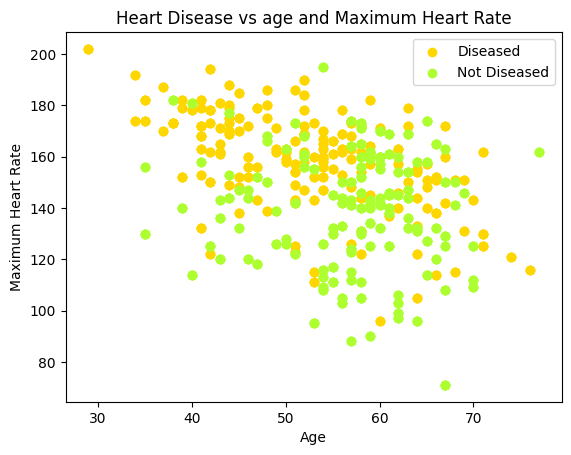

In [30]:
#Create a scatter plot for Heart disese vs Age and maximum heart rate
# This is to give ua a general view of those with and without heart disease (target=1...Those with heart disease, 0...without heart disease)

plt.scatter(x=df.age[df.target ==1],y=df.thalach[df.target ==1], c='#FFD700', label='Diseased')
plt.scatter(x=df.age[df.target ==0],y=df.thalach[df.target ==0], c='#ADFF2F', label='Not Diseased')

#Add a legend(This is intended to provide beter understading for the reader of the details of a scatter plot)
plt.legend()

# Add labels to the axes
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate')

# Set the title of the plot
plt.title('Heart Disease vs age and Maximum Heart Rate')

# Display the scatter plot
plt.show

In [31]:
# Create a logistic regression
#Help to solve problems with classification
# Create the independent variables and dependant variables

y=df.target.values
x_data =df.drop(['target'],axis =1)


In [32]:
# normalize the data
x = (x_data -np.min(x_data))/ (np.max(x_data))-np.min(x_data)

In [33]:
#split the data 89% for training and 20% for testing
x_train, x_test,y_train,y_test =train_test_split(x,y,test_size=0.2,random_state=0)

In [34]:
# Transpose matrices
x_train =x_train.T
y_train =y_train.T
x_test =x_test.T
y_test =y_test.T

In [35]:
# Get the accuracy using the logistic regression
# Getting the test accuracy
accuracies= {}
lr=LogisticRegression()
lr.fit(x_train.T, y_train.T)
acc =lr.score(x_test.T,y_test.T)*100
accuracies['logisticRegression']=acc

# Output
print('Test Accuracy{:.2f}%'.format(acc))

Test Accuracy72.68%


K-nearest neighbour

In [42]:
# import the K- nearest  neighbours (KNN) classifier
# Get accuracy score of the K-nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(x_train.T, y_train.T)
prediction = knn.predict(x_test.T)

#Get output display
print('{} NN Score: {:.2f}%'.format(2, knn.score(x_train.T, y_train.T)*100))

2 NN Score: 99.39%


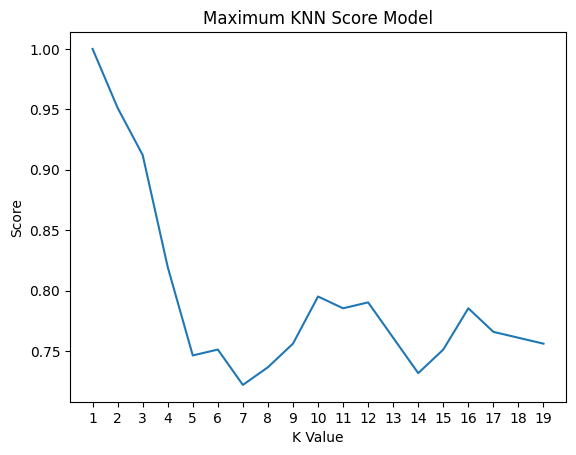

Maximum KNN Score is 100.00%


In [ ]:
#Get Maximum KNN score for the model
score_list = []
for i in range(1, 20):
    knn2 = KNeighborsClassifier(n_neighbors = i)
    knn2.fit(x_train.T, y_train.T)
    score_list.append(knn2.score(x_test.T, y_test.T))
    
 #Show using line plot
plt.plot(range(1, 20), score_list)
plt.xticks(np.arange(1, 20, 1))
plt.xlabel('K Value')
plt.ylabel('Score')
plt.title('Maximum KNN Score Model')
plt.show()

#Get Maximum KNN score for the model in percentage
acc = max(score_list) * 100
accuracies['KNN'] = acc
print('Maximum KNN Score is {:.2f}%'.format(acc))

Support vector machines

In [37]:
#Test the accuracy using the support vector machine(SVM) algorithm
from sklearn.svm import SVC
svm = SVC(random_state = 1)
svm.fit(x_train.T, y_train.T)

acc = svm.score(x_train.T, y_train.T)*100
accuracies['SVM'] = acc
print('Test Accuracy of SVM Algorithm: {:.2f}%'.format(acc))

Test Accuracy of SVM Algorithm: 70.24%


Naive Bayes Theorem

In [39]:
#Get accuracy using Naive Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train.T, y_train.T)

acc = nb.score(x_test.T, y_test.T) * 100
accuracies['Naive Bayes'] = acc
print('Test Accuracy of Naive Bayes: {:.2f}%'.format(acc))

Test Accuracy of Naive Bayes: 85.37%


In [40]:
#Get accuracy using a decision tree model
from sklearn.tree import DecisionTreeClassifier
atc = DecisionTreeClassifier()
atc.fit(x_train.T, y_train.T)

acc = atc.score(x_test.T, y_test.T) * 100
accuracies['Decision Tree'] = acc
print('Decision Tree Test Accuracy: {:.2f}%'.format(acc))

Decision Tree Test Accuracy: 100.00%


Random forest classifier

In [43]:
#Get accuracy of random forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(x_train.T, y_train.T)

acc = rf.score(x_test.T, y_test.T) * 100
accuracies['Random Forest'] = acc
print('Random Forest Algorithm Accuracy Score: {:.2f}%'.format(acc))

Random Forest Algorithm Accuracy Score: 100.00%


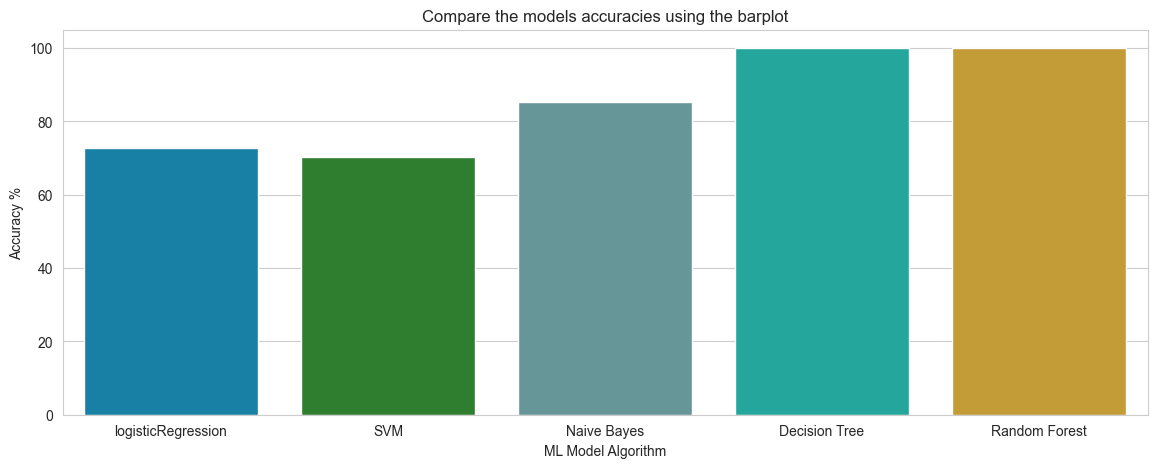

In [44]:
#Compare the models accuracy using the barplot from sns
import seaborn as sns

colors = ['#008BBB', '#228B22', '#5F9EA0', '#0FBBAE', '#DAA520', '#CFC60E']

sns.set_style('whitegrid')
plt.figure(figsize=(14, 5))
plt.xticks(np.arange(0,100,10))
plt.title('Compare the models accuracies using the barplot')
plt.ylabel('Accuracy %')
plt.xlabel('ML Model Algorithm')
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

Confusion matriices

In [45]:
#ML confusion matrix
#Evaluate the performance of a matrix
#Get confusion matrices to look at the inbalance dataset
#Predicted values
y_head_lr = lr.predict(x_test.T)
knn3 = KNeighborsClassifier(n_neighbors = 3)
knn3.fit(x_train.T, y_train.T)
y_head_knn = knn3.predict(x_test.T)
y_head_svm = svm.predict(x_test.T)
y_head_nb = nb.predict(x_test.T)
y_head_atc = atc.predict(x_test.T)
y_head_rf = rf.predict(x_test.T)

In [47]:
# import module for confusion matrix

from sklearn.metrics import confusion_matrix
cm_lr = confusion_matrix(y_test, y_head_lr)
cm_knn = confusion_matrix(y_test, y_head_knn)
cm_svm = confusion_matrix(y_test, y_head_svm)
cm_nb = confusion_matrix(y_test, y_head_nb)
cm_atc = confusion_matrix(y_test, y_head_atc)
cm_rf = confusion_matrix(y_test, y_head_rf)

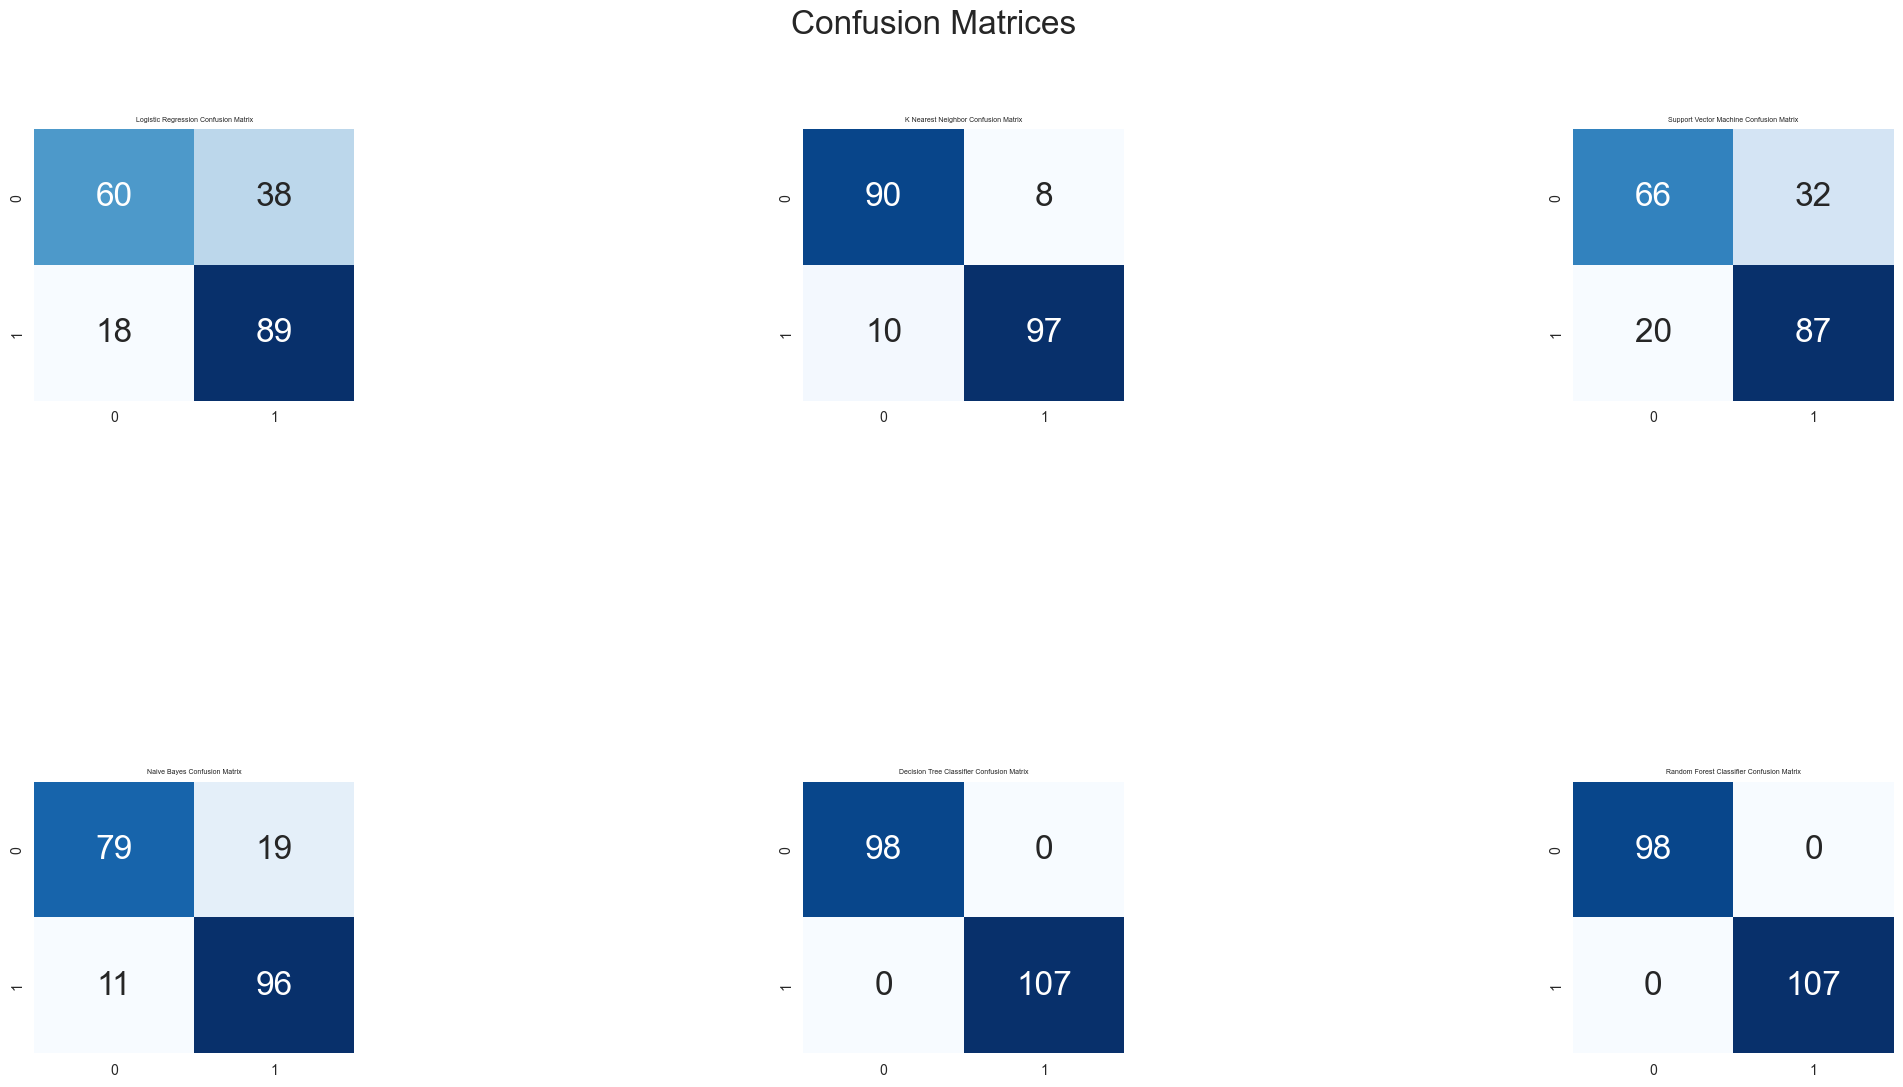

In [48]:
#Plotting a heatmap for confusion matrix
plt.figure(figsize=(24, 12))
plt.suptitle("Confusion Matrices",fontsize = 24)
plt.subplots_adjust(wspace = 1.4, hspace = 1.4)

#Heatmap for "Logistic Regression Confusion Matrix"
plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix", fontsize = 5)
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False,annot_kws={"size":24})

#Heatmap for "K Nearest Neighbor Confusion Matrix"
plt.subplot(2,3,2)
plt.title("K Nearest Neighbor Confusion Matrix", fontsize = 5)
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False,annot_kws={"size":24})

#Heatmap for "Support Vector Machine Confusion Matrix"
plt.subplot(2,3,3)
plt.title("Support Vector Machine Confusion Matrix", fontsize = 5)
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False,annot_kws={"size":24})

#Heatmap for "Naive Bayes Confusion Matrix"
plt.subplot(2,3,4)
plt.title("Naive Bayes Confusion Matrix", fontsize = 5)
sns.heatmap(cm_nb,annot=True,cmap="Blues",fmt="d",cbar=False,annot_kws={"size":24})

#Heatmap for "Decision Tree Classifier Confusion Matrix"
plt.subplot(2,3,5)
plt.title("Decision Tree Classifier Confusion Matrix", fontsize = 5)
sns.heatmap(cm_atc,annot=True,cmap="Blues",fmt="d",cbar=False,annot_kws={"size":24})

#Heatmap for "Random Forest Classifier Confusion Matrix"
plt.subplot(2,3,6)
plt.title("Random Forest Classifier Confusion Matrix", fontsize = 5)
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False,annot_kws={"size":24})

plt.show()